### Importing Necessary Packages

In [3]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sns
%matplotlib inline
from scipy import stats, linalg

## Importing Data

In [39]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Jahangirnagar University/Introduction to Data Science with Python/Project Report/house_data_missing.csv')

In [40]:
data.head(2)

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00       1180.0   
1  6414100192  20141209T000000  538000.0         3       2.25       2570.0   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   

   sqft_lot15  
0        5650  
1        7639  

[2 rows x 21 columns]

In [33]:
data.shape

(21613, 20)

In [9]:
data.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living      float64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [32]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Data Preprocessing

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  float64
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float

In [28]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      6
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [48]:
# Replace Missing Value with an average value
data.fillna(data.mean(), inplace=True)

In [11]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
data.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.401822e+05      3.370842      2.114757   2079.954783  1.510697e+04   
std    3.673622e+05      0.930062      0.770163    918.318479  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318      0.650743      1.175459   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21613.000000   21613.000000  21613.000000  21613.000000  21613.000000   
mean    1788.390691     291.509045   1971.005136     84.402258  98077.939805   
std      828.090978     442.575043     29.373411    401.679240     53.505026   
min      290.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     560.000000   1997.000000      0.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000   21613.000000   21613.000000  
mean      47.560053   -122.213896    1986.552492   12768.455652  
std        0.138564      0.140828     685.391304   27304.179631  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471000   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.230000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

In [30]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      6
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [29]:
data.isnull().values.any()

True

## EDA(Exploratory Data Analysis)

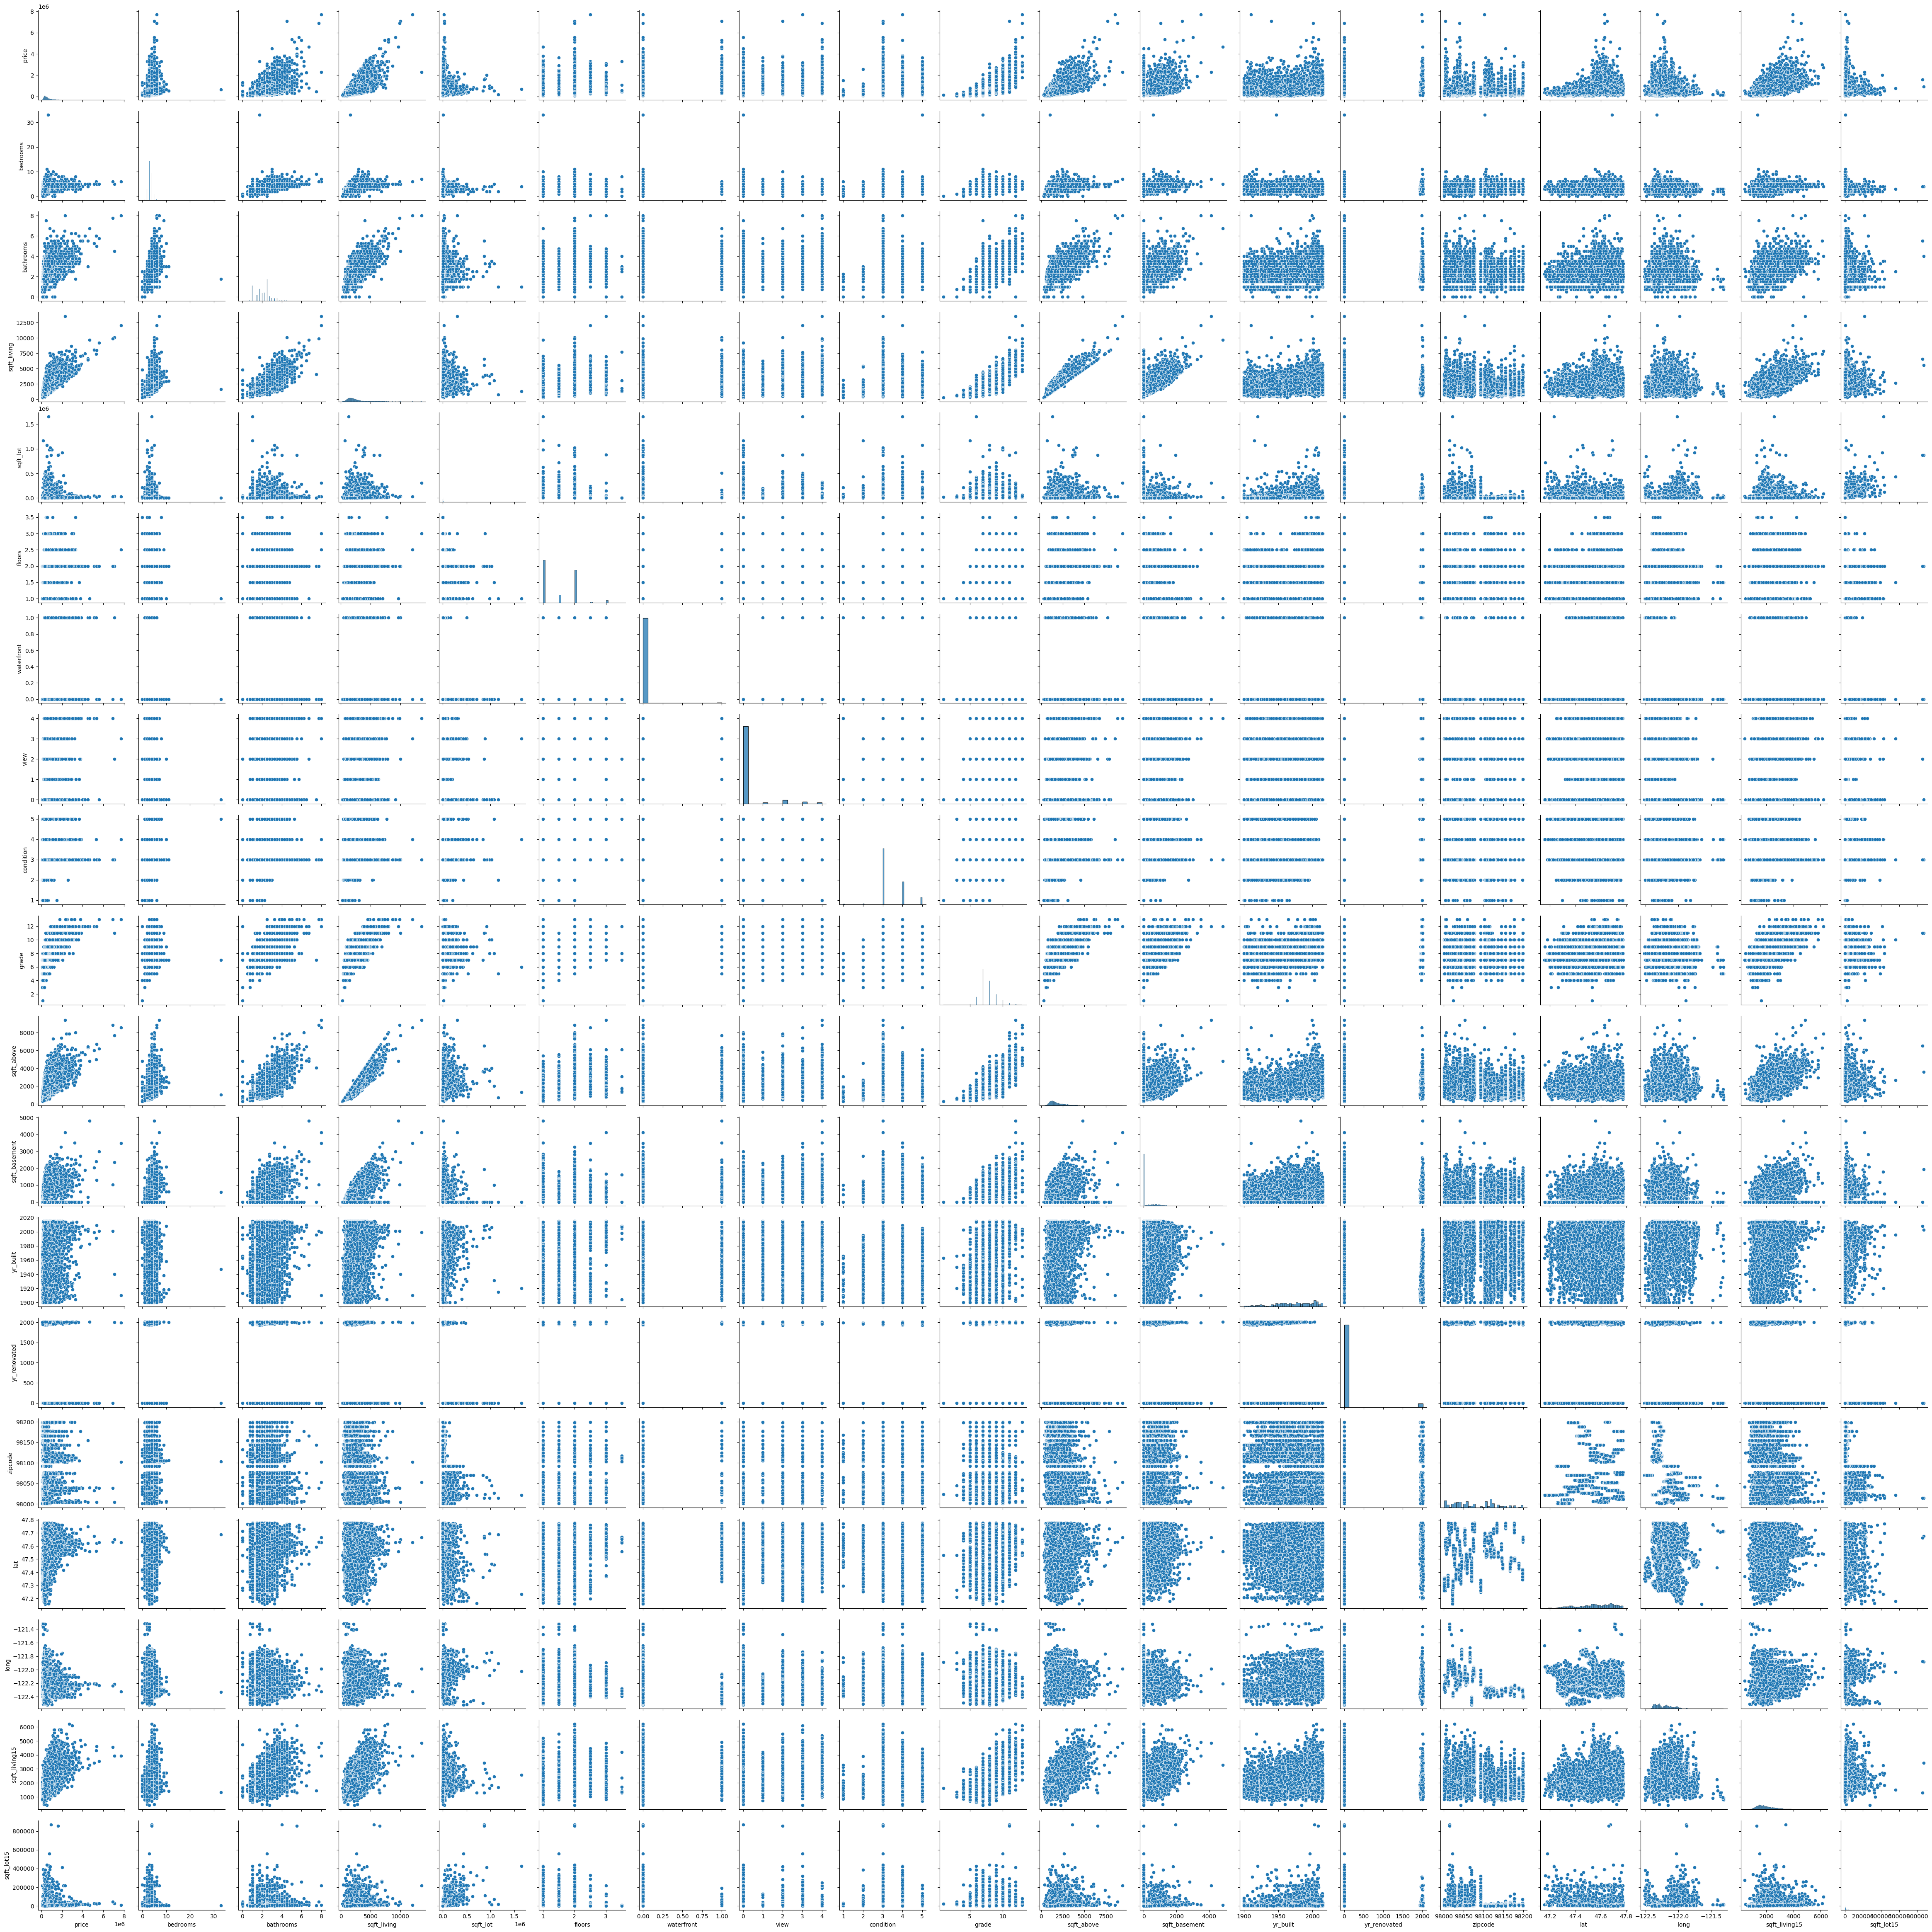

In [41]:
## Creating the pairplot
sns.pairplot(data)

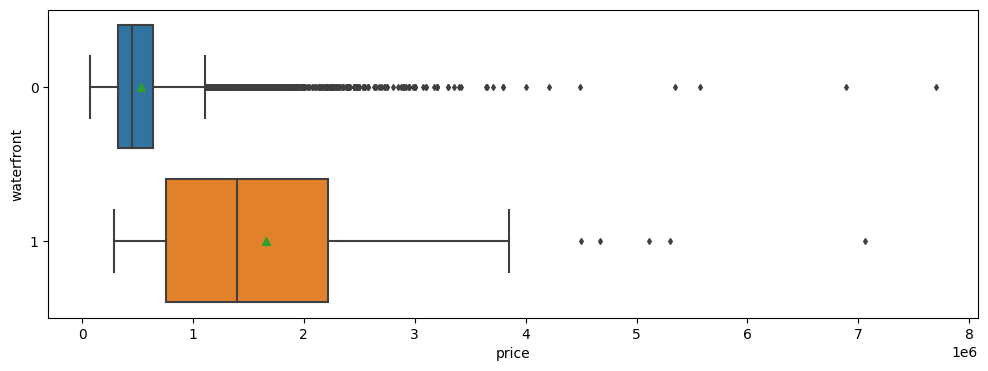

point biserial correlation r is 0.2663305105222564 with p = 0.0


In [45]:
# Let's show boxplots first
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'waterfront', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = ax)
plt.show()

# Calculate the correlation coefficient
r, p = stats.pointbiserialr(data['waterfront'], data['price'])
print ('point biserial correlation r is %s with p = %s' %(r,p))

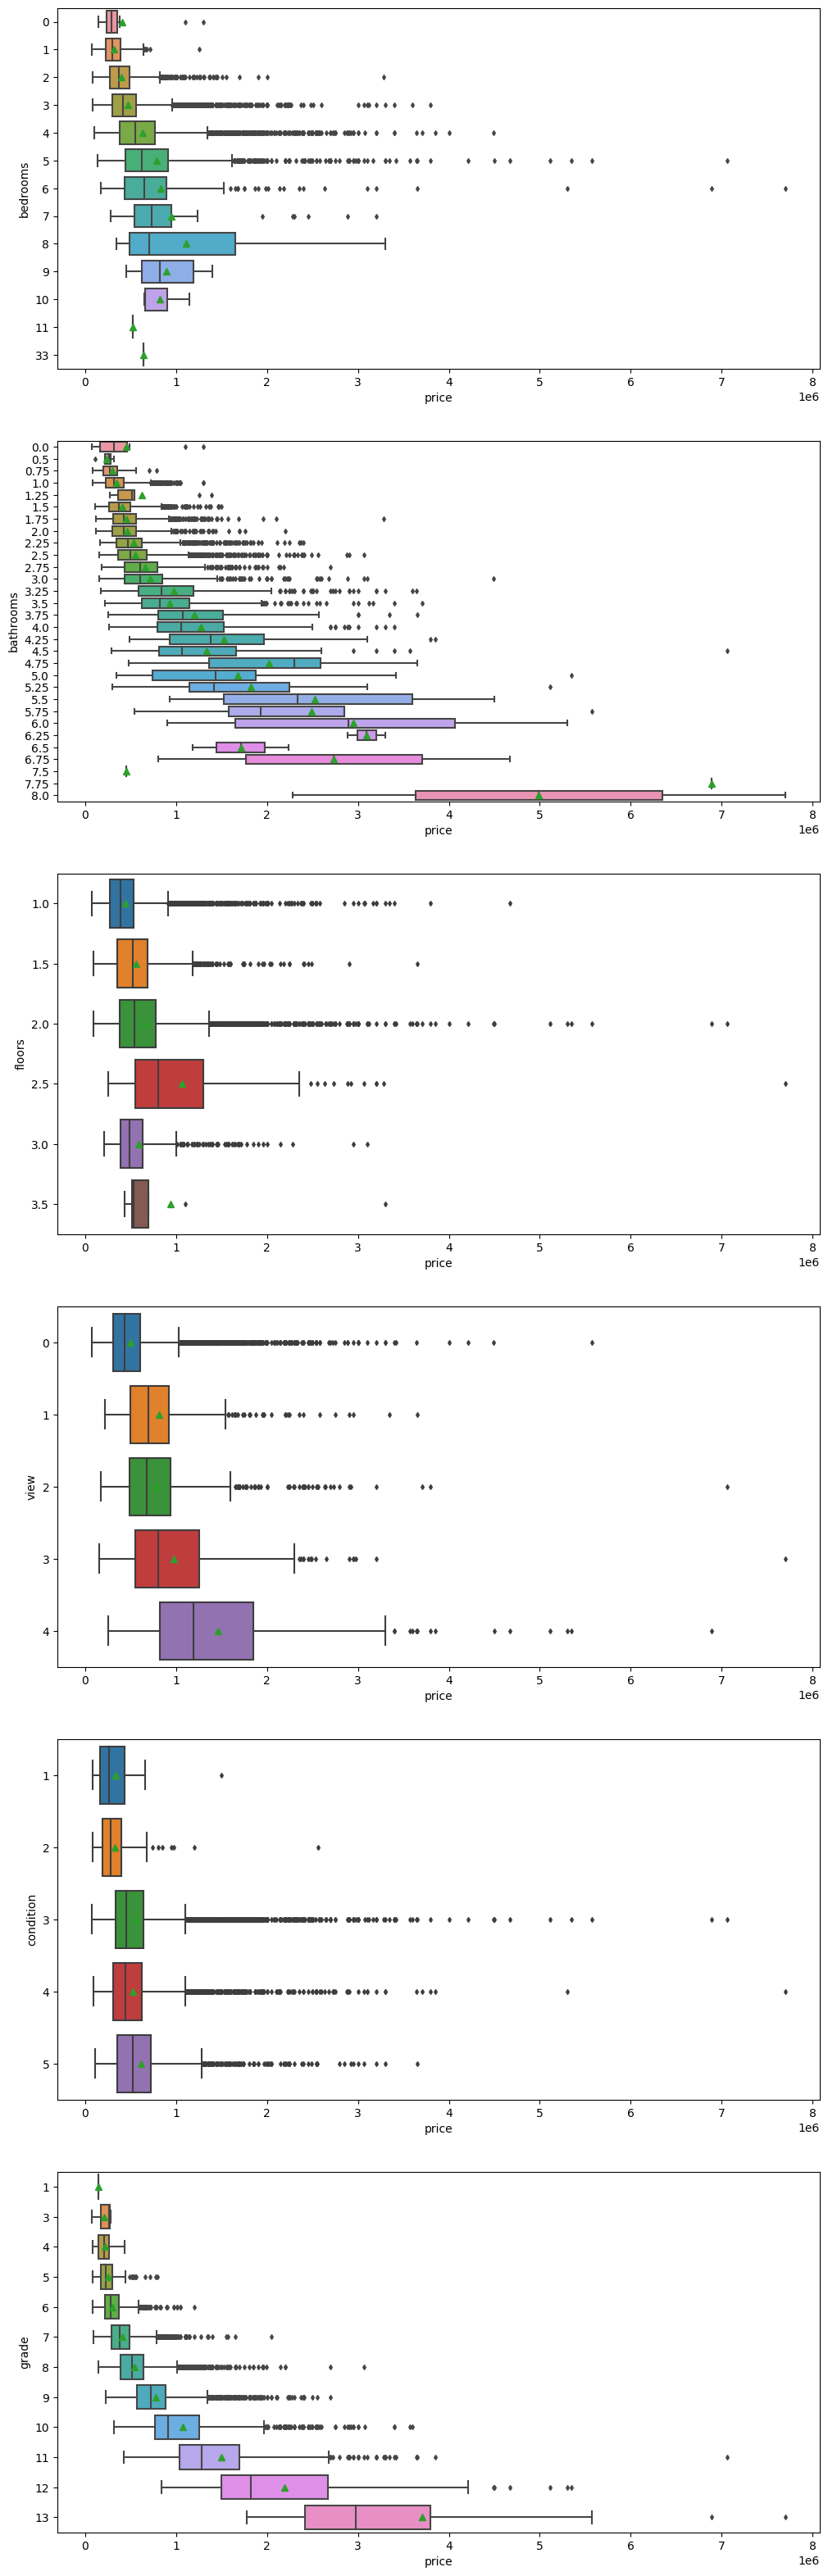

In [49]:
fig, axarr = plt.subplots(6, figsize=(12,40))
sns.boxplot(y = 'bedrooms', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[0])
sns.boxplot(y = 'bathrooms', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[1])
sns.boxplot(y = 'floors', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[2])
sns.boxplot(y = 'view', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[3])
sns.boxplot(y = 'condition', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[4])
sns.boxplot(y = 'grade', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[5])
plt.show()

<Axes: xlabel='yr_built', ylabel='count'>

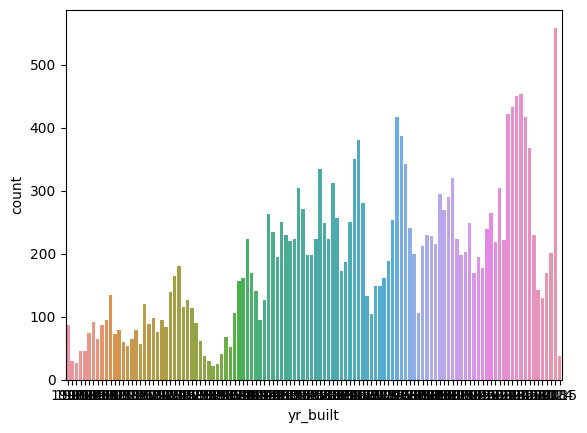

In [50]:
sns.countplot(data=data,x='yr_built')

<Axes: xlabel='yr_built', ylabel='price'>

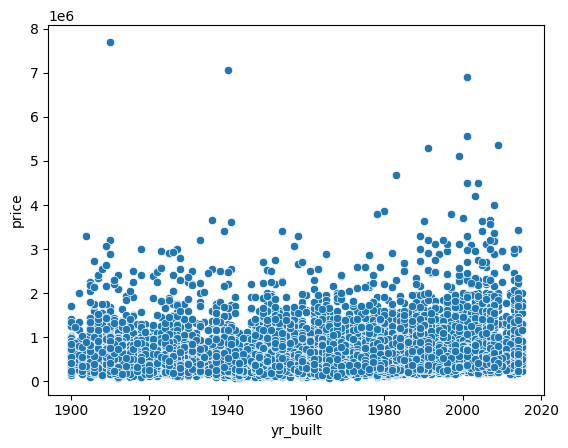

In [19]:
sns.scatterplot(data=data,x='yr_built',y='price')

<Axes: xlabel='sqft_living', ylabel='price'>

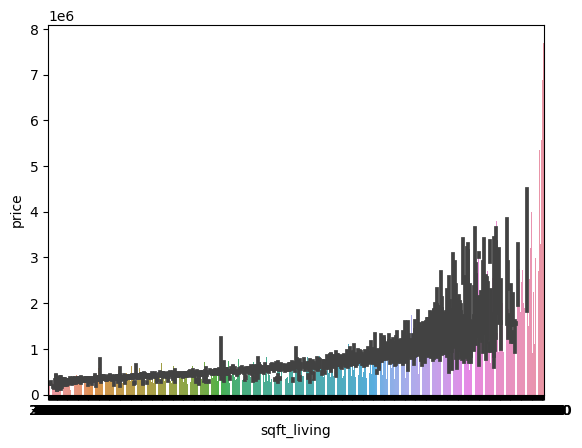

In [20]:
sns.barplot(data=data,x='sqft_living',y='price')

In [21]:
corr=data.corr()
corr

<ipython-input-21-0d3ae1d0be10>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308338   0.525134     0.701735  0.089655  0.256786   
bedrooms       0.308338  1.000000   0.515884     0.576534  0.031703  0.175429   
bathrooms      0.525134  0.515884   1.000000     0.754605  0.087740  0.500653   
sqft_living    0.701735  0.576534   0.754605     1.000000  0.172838  0.353970   
sqft_lot       0.089655  0.031703   0.087740     0.172838  1.000000 -0.005201   
floors         0.256786  0.175429   0.500653     0.353970 -0.005201  1.000000   
waterfront     0.266331 -0.006582   0.063744     0.103826  0.021604  0.023698   
view           0.397346  0.079532   0.187737     0.284516  0.074710  0.029444   
condition      0.036392  0.028472  -0.124982    -0.058859 -0.008958 -0.263768   
grade          0.667463  0.356967   0.664983     0.762673  0.113621  0.458183   
sqft_above     0.605566  0.477600   0.685342     0.876567  0.183512  0.523885   
sqft_basement  0.323837  0.303093   0.283770     0.434822  0.015286 -0.245705   
yr_built       0.053982  0.154178   0.506019     0.318220  0.053080  0.489319   
yr_renovated   0.126442  0.018841   0.050739     0.054920  0.007644  0.006338   
zipcode       -0.053168 -0.152668  -0.203866    -0.199548 -0.129574 -0.059121   
lat            0.306919 -0.008931   0.024573     0.052566 -0.085683  0.049614   
long           0.021571  0.129473   0.223042     0.240298  0.229521  0.125419   
sqft_living15  0.585374  0.391638   0.568634     0.756313  0.144608  0.279885   
sqft_lot15     0.082456  0.029244   0.087175     0.183299  0.718557 -0.011269   

               waterfront      view  condition     grade  sqft_above  \
price            0.266331  0.397346   0.036392  0.667463    0.605566   
bedrooms        -0.006582  0.079532   0.028472  0.356967    0.477600   
bathrooms        0.063744  0.187737  -0.124982  0.664983    0.685342   
sqft_living      0.103826  0.284516  -0.058859  0.762673    0.876567   
sqft_lot         0.021604  0.074710  -0.008958  0.113621    0.183512   
floors           0.023698  0.029444  -0.263768  0.458183    0.523885   
waterfront       1.000000  0.401857   0.016653  0.082775    0.072075   
view             0.401857  1.000000   0.045990  0.251321    0.167649   
condition        0.016653  0.045990   1.000000 -0.144674   -0.158214   
grade            0.082775  0.251321  -0.144674  1.000000    0.755923   
sqft_above       0.072075  0.167649  -0.158214  0.755923    1.000000   
sqft_basement    0.080588  0.276947   0.174105  0.168392   -0.051943   
yr_built        -0.026161 -0.053440  -0.361417  0.446963    0.423898   
yr_renovated     0.092885  0.103917  -0.060618  0.014414    0.023285   
zipcode          0.030285  0.084827   0.003026 -0.184862   -0.261190   
lat             -0.014274  0.006157  -0.014941  0.114084   -0.000816   
long            -0.041910 -0.078400  -0.106500  0.198372    0.343803   
sqft_living15    0.086463  0.280439  -0.092824  0.713202    0.731870   
sqft_lot15       0.030703  0.072575  -0.003406  0.119248    0.194050   

               sqft_basement  yr_built  yr_renovated   zipcode       lat  \
price               0.323837  0.053982      0.126442 -0.053168  0.306919   
bedrooms            0.303093  0.154178      0.018841 -0.152668 -0.008931   
bathrooms           0.283770  0.506019      0.050739 -0.203866  0.024573   
sqft_living         0.434822  0.318220      0.054920 -0.199548  0.052566   
sqft_lot            0.015286  0.053080      0.007644 -0.129574 -0.085683   
floors             -0.245705  0.489319      0.006338 -0.059121  0.049614   
waterfront          0.080588 -0.026161      0.092885  0.030285 -0.014274   
view                0.276947 -0.053440      0.103917  0.084827  0.006157   
condition           0.174105 -0.361417     -0.060618  0.003026 -0.014941   
grade               0.168392  0.446963      0.014414 -0.184862  0.114084   
sqft_above         -0.051943  0.423898      0.023285 -0.261190 -0.000816   
sqft_basement       1.000000 -0.133124      

<Axes: >

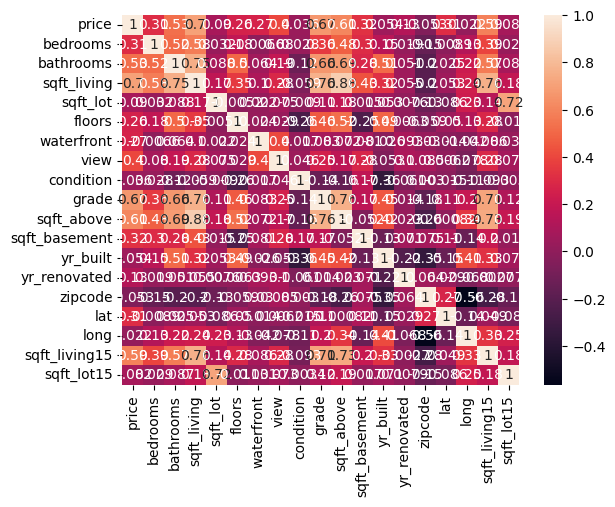

In [22]:
sns.heatmap(corr, annot=True)

## Machine Learning Model Building

In [58]:
#importing machine leaning library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [37]:
data.head(2)

date     price  bedrooms  bathrooms  sqft_living  \
id                                                                        
7129300520  20141013T000000  221900.0         3       1.00       1180.0   
6414100192  20141209T000000  538000.0         3       2.25       2570.0   

            sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
id                                                                             
7129300520      5650     1.0           0     0          3      7        1180   
6414100192      7242     2.0           0     0          3      7        2170   

            sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
id                                                                             
7129300520              0      1955             0    98178  47.5112 -122.257   
6414100192            400      1951          1991    98125  47.7210 -122.319   

            sqft_living15  sqft_lot15  
id                                     
7129300520           1340        5650  
6414100192           1690        7639

In [41]:
#Data Cleaning
data.drop(['id', 'date'], axis=1, inplace=True)

In [36]:
data.head(2)

date     price  bedrooms  bathrooms  sqft_living  \
id                                                                        
7129300520  20141013T000000  221900.0         3       1.00       1180.0   
6414100192  20141209T000000  538000.0         3       2.25       2570.0   

            sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
id                                                                             
7129300520      5650     1.0           0     0          3      7        1180   
6414100192      7242     2.0           0     0          3      7        2170   

            sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
id                                                                             
7129300520              0      1955             0    98178  47.5112 -122.257   
6414100192            400      1951          1991    98125  47.7210 -122.319   

            sqft_living15  sqft_lot15  
id                                     
7129300520           1340        5650  
6414100192           1690        7639

In [50]:
x=data.drop(['price', 'view','condition', 'grade'], axis=1)
y=data['price']
print('Shape of X:', x.shape)
print('Shape of Y:', y.shape)

Shape of X: (21613, 15)
Shape of Y: (21613,)


In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2, 
                                                    random_state=2023)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17290, 15) (4323, 15) (17290,) (4323,)


In [44]:
lr=LinearRegression()

In [52]:
model=lr.fit(x_train, y_train)

In [53]:
coefficients = model.coef_
print(coefficients)

[-5.63069785e+04  6.04622733e+04 -2.97855004e+02  2.27969592e-01
  2.16149053e+04  7.99518589e+05  5.50634864e+02  5.13165094e+02
 -2.39275558e+03  2.13074268e+01 -5.98046155e+02  6.50838996e+05
 -3.24506759e+05  7.92357290e+01 -4.60790087e-01]


In [55]:
coef_df = pd.DataFrame({"features": x.columns, 
                       "coefficients": np.squeeze(coefficients)})

display(coef_df)

features   coefficients
0        bedrooms  -56306.978539
1       bathrooms   60462.273311
2     sqft_living    -297.855004
3        sqft_lot       0.227970
4          floors   21614.905290
5      waterfront  799518.588837
6      sqft_above     550.634864
7   sqft_basement     513.165094
8        yr_built   -2392.755585
9    yr_renovated      21.307427
10        zipcode    -598.046155
11            lat  650838.996355
12           long -324506.758549
13  sqft_living15      79.235729
14     sqft_lot15      -0.460790

## Prediction

In [56]:
y_pred = model.predict(x_test)
print(y_pred)

[582233.24894984 696751.52964625 858979.55613951 ... 430170.54861982
 411260.79792875 324768.05068661]


## Evaluation the Model

In [59]:
MAE = mean_absolute_error(y_test, y_pred)
print("MAE = ", MAE)

MSE = mean_squared_error(y_test, y_pred, squared=True)
print("MSE = ", MSE)

RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE = ", RMSE)

r2 = r2_score(y_test, y_pred)#Goodness of fit-coefficent of determination
print("r_squared = ", r2)

MAE =  134357.73134016275
MSE =  39436160891.461296
RMSE =  198585.3994921613
r_squared =  0.6575637491657955


In [60]:
y_pred = model.predict(X_test)

price = pd.DataFrame({"Price_actual":y_test,
                   "Price_predicted": y_pred})

price.head()

Price_actual  Price_predicted
10221      270000.0    582233.248950
8720       364988.0    696751.529646
10314      709000.0    858979.556140
6533       225000.0    271125.810578
9294       826000.0    513683.011656

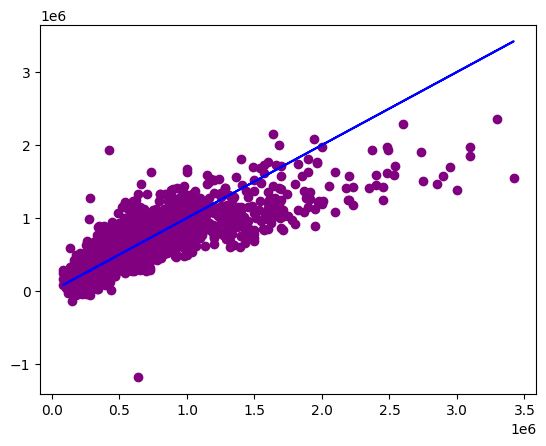

<Figure size 640x480 with 0 Axes>

In [61]:
plt.scatter(price['Price_actual'],price['Price_predicted'], color = 'purple')
plt.plot(price['Price_actual'],price['Price_actual'], color = 'blue')
plt.show()
plt.tight_layout()